In [1]:
from ase.io import read
from sklearn.decomposition import PCA, KernelPCA
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation
import numpy as np
from ase.visualize.plot import plot_atoms

In [2]:
chair = read('../cyclohexane_data/conformers/chair.xyz')
chair.cell = None
chair.positions = chair.positions - np.mean(chair.positions, axis=0)

In [3]:
def plot_mol(positions, ax, vecs=["x", "y", "z"], fs=14, x=-0.5, y=-0.75):
    atoms = chair.copy()
    atoms.positions = positions
    plot_atoms(atoms, ax=ax)
    ax.arrow(x,
             y,
             1,
             0,
             width=0.05,
             clip_on=False,
             color='k',
             head_length=0.3,
             head_width=0.3)
    ax.text(s=vecs[0],
            x=x + 0.25,
            y=y - 0.25,
            fontsize=fs,
            ha='center',
            va='top')
    ax.arrow(x,
             y,
             0,
             1,
             width=0.05,
             clip_on=False,
             color='k',
             head_length=0.3,
             head_width=0.3)
    ax.text(s=vecs[1],
            x=x - 0.25,
            y=y + 0.25,
            fontsize=fs,
            ha='right',
            va='center')
    ax.arrow(x,
             y,
             0.3,
             0.5,
             width=0.05,
             clip_on=False,
             color='k',
             head_length=0.3,
             head_width=0.3)
    ax.text(s=vecs[2],
            x=x + 0.5,
            y=y + 0.5,
            fontsize=fs,
            ha='left',
            va='bottom')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [4]:
def plot_dims(p):
    fig, ax = plt.subplots(1,3,figsize=(10,3))
    ax[0].scatter(p[:, 0], p[:, 1], c=chair.numbers)
    ax[1].scatter(p[:, 0], p[:, 2], c=chair.numbers)
    ax[2].scatter(p[:, 1], p[:, 2], c=chair.numbers)

In [45]:
r = Rotation.random().as_matrix()

In [46]:
rot_positions = chair.positions @ r

chair_rot = chair.copy()
chair_rot.positions = rot_positions

In [47]:
positions_pca = PCA(n_components=3).fit_transform(rot_positions)

chair_pca = chair.copy()
chair_pca.positions = positions_pca

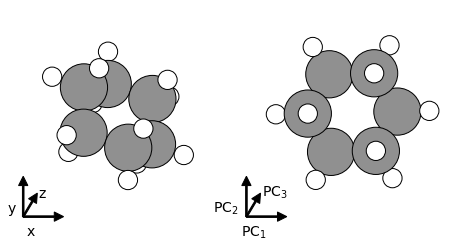

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

fs = 14
y = -0.75
x = -0.5

plot_mol(rot_positions, ax=ax[0])
plot_mol(positions_pca, ax=ax[1], vecs = [r'$\mathrm{PC}_1$', r'$\mathrm{PC}_2$', r'$\mathrm{PC}_3$'])

ax[1].set_xlim([-1,6])
ax[1].set_ylim([-1,6])

fig.subplots_adjust(wspace=0)
plt.savefig("Figure3.pdf")

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

In [ ]:
positions_lle = LLE(n_components=3,
                    n_neighbors=2).fit_transform(chair.positions)
positions_lle

In [ ]:
plot_dims(positions_lle)

In [ ]:
plot_mol(positions_lle, ax = plt.subplots()[1])